In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_and_concat_datasets(parent_folder, channels):
    datasets = [
        xr.open_dataset(f'{parent_folder}/{channel}')[channel.split('.')[0]]
        for channel in channels
    ]
    ds_combined = xr.concat(datasets, dim='channels')
    return ds_combined

def find_min_max_across_channels(ds_combined):
    mins = [np.nanmin(ds_combined[i].values) for i in range(ds_combined.shape[0])]
    maxs = [np.nanmax(ds_combined[i].values) for i in range(ds_combined.shape[0])]
    return np.nanmin(mins), np.nanmax(maxs)

def rescale_data(data, global_min, global_max):
    return 255 * (data - global_min) / (global_max - global_min)

In [3]:
parent_folder = '/Users/rashmilsinha/Downloads/Sentinel-lite/sentinel/'
channels_radiance = [
    'S1_radiance_in.nc', 'S2_radiance_in.nc', 'S3_radiance_in.nc',
    'S4_radiance_in.nc', 'S5_radiance_in.nc', 'S6_radiance_in.nc'
]
channels_thermal = ['S7_BT_in.nc', 'S8_BT_in.nc', 'S9_BT_in.nc']
channels = channels_radiance + channels_thermal

In [4]:
ds_combined = load_and_concat_datasets(parent_folder, channels)

global_min, global_max = find_min_max_across_channels(ds_combined)

rescaled_data = xr.apply_ufunc(
    rescale_data,
    ds_combined,
    kwargs={'global_min': global_min, 'global_max': global_max},
    vectorize=True
)

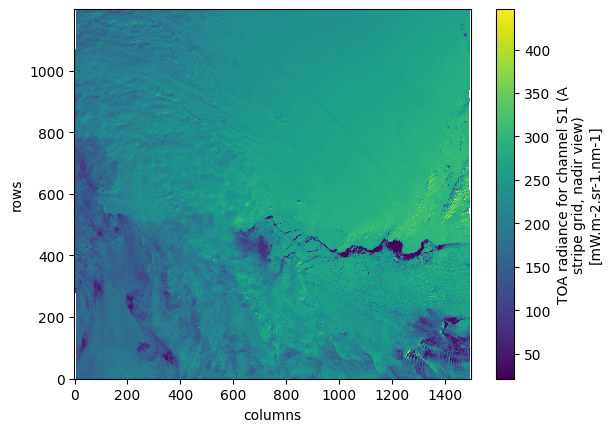

In [5]:
ds_combined[0].plot()

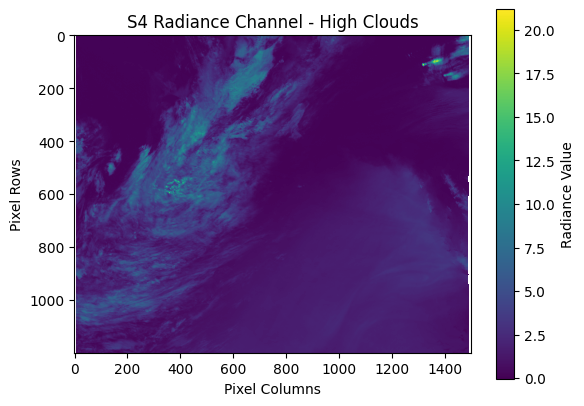

In [6]:
one_channel = ds_combined[3].values
plt.imshow(one_channel, cmap='viridis')
plt.title('S4 Radiance Channel - High Clouds')
plt.xlabel('Pixel Columns')
plt.ylabel('Pixel Rows')
cbar = plt.colorbar()
cbar.set_label('Radiance Value')
plt.show()

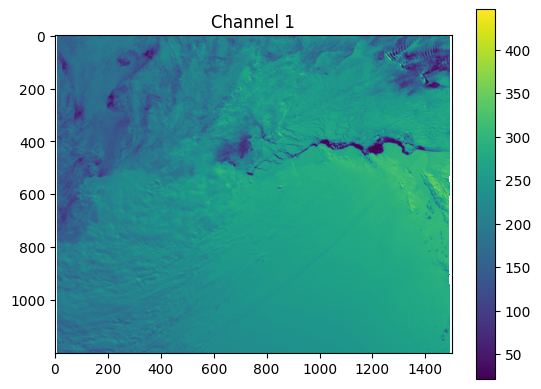

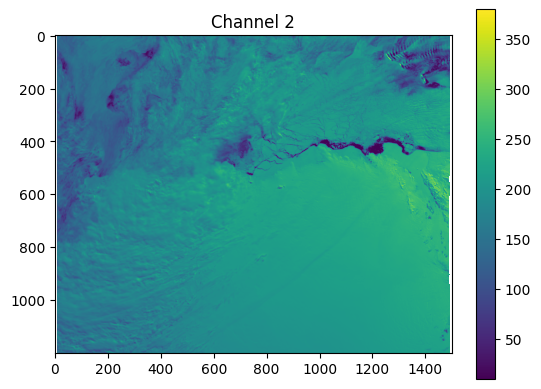

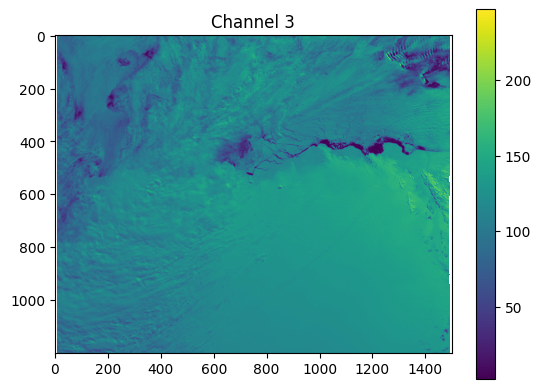

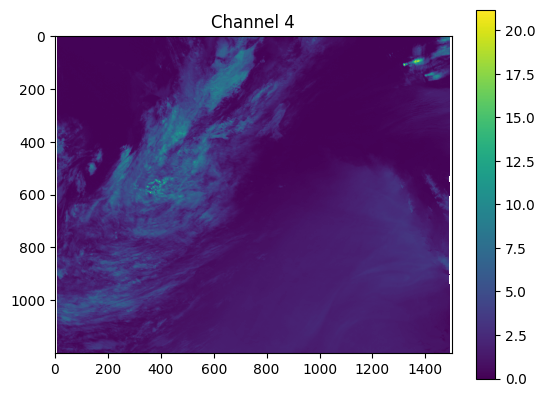

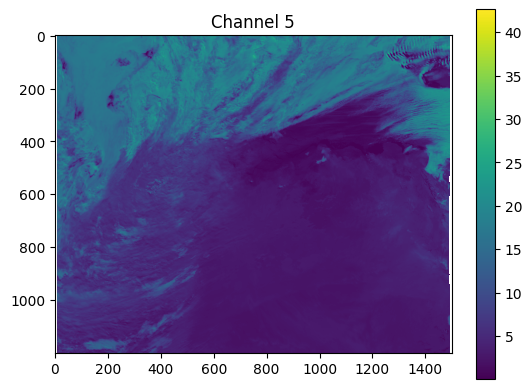

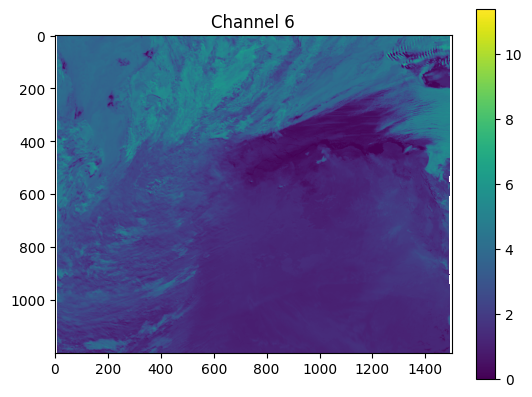

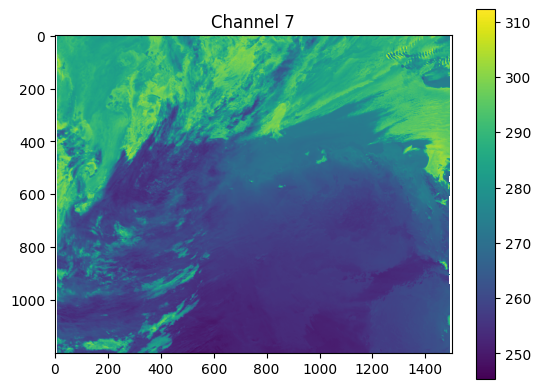

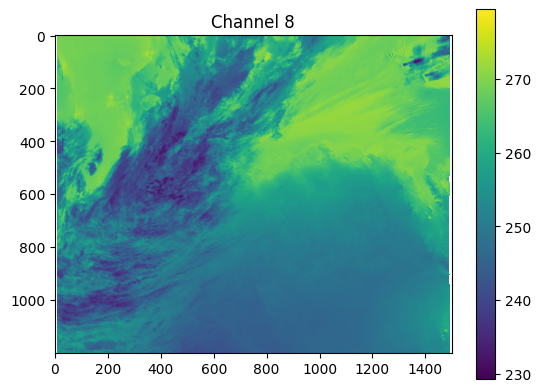

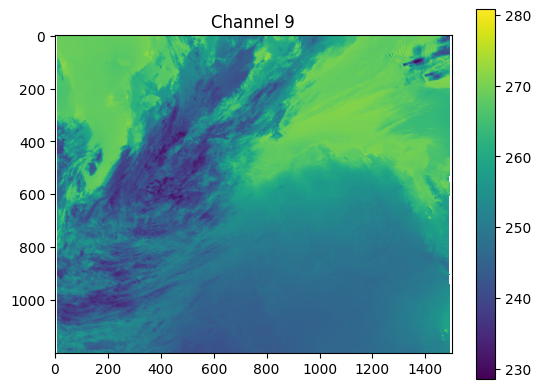

In [7]:
for i in range(ds_combined.shape[0]):
    plt.figure()
    plt.imshow(ds_combined[i].values, cmap='viridis')
    plt.colorbar()
    plt.title(f"Channel {i + 1}")
    plt.show()

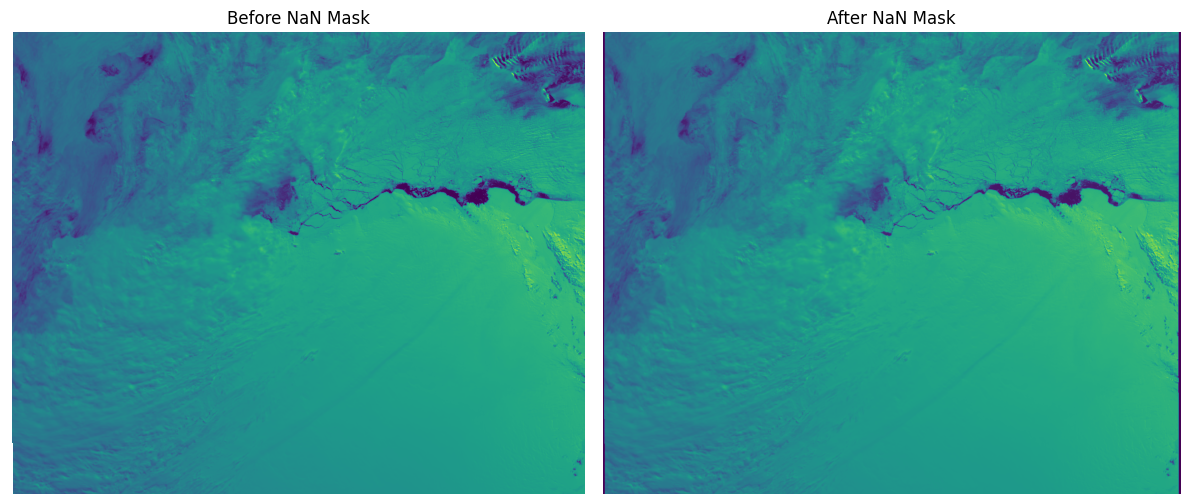

In [10]:
import matplotlib.pyplot as plt

def plot_before_after(before_data, after_data, title_before, title_after):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plotting data before NaN mask
    ax[0].imshow(before_data, cmap='viridis')
    ax[0].set_title(title_before)
    ax[0].axis('off')
    
    # Plotting data after NaN mask
    ax[1].imshow(after_data, cmap='viridis')
    ax[1].set_title(title_after)
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.show()

original_data = ds_combined[0].values
nan_masked_data = np.where(np.isnan(original_data), 0, original_data)

plot_before_after(original_data, nan_masked_data, "Before NaN Mask", "After NaN Mask")


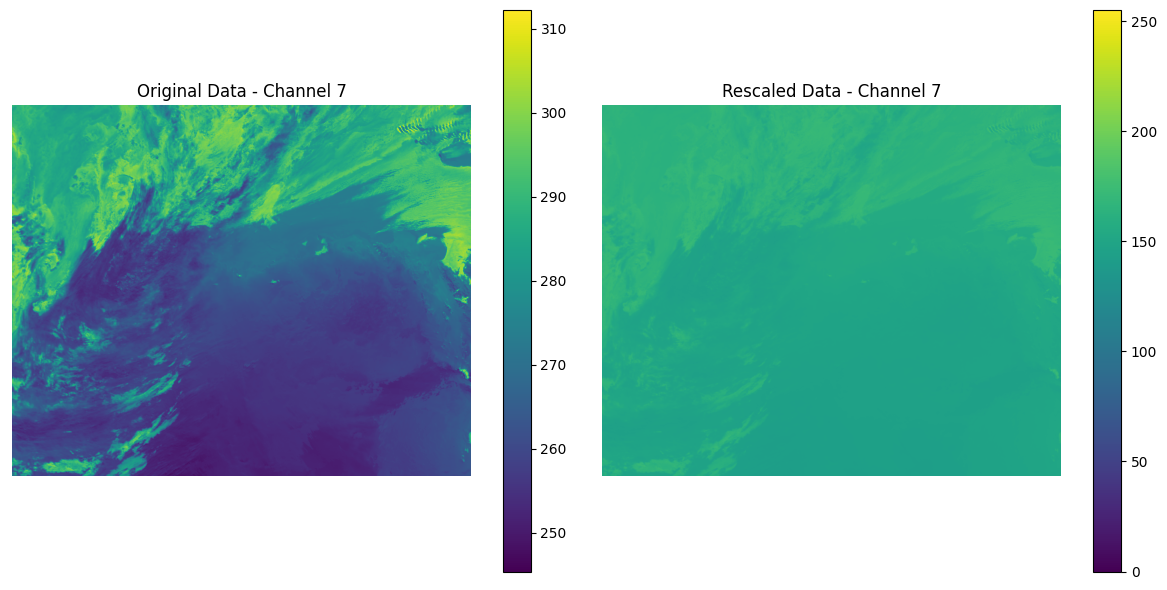

In [11]:
import matplotlib.pyplot as plt

def plot_comparison(before, after, vmin=None, vmax=None):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Original data
    im1 = ax[0].imshow(before, cmap='viridis', vmin=vmin, vmax=vmax)
    ax[0].set_title(f"Original Data - Channel {channel_index + 1}")
    ax[0].axis('off')
    fig.colorbar(im1, ax=ax[0])
    
    # Rescaled data
    im2 = ax[1].imshow(after, cmap='viridis', vmin=0, vmax=255)  # Since rescaled data is in range 0-255
    ax[1].set_title(f"Rescaled Data - Channel {channel_index + 1}")
    ax[1].axis('off')
    fig.colorbar(im2, ax=ax[1])
    
    plt.tight_layout()
    plt.show()

# Choose a channel for visualization
channel_index = 6
original_data = ds_combined[channel_index].values

# Compute rescaled data for the chosen channel
rescaled_channel_data = rescale_data(original_data, global_min, global_max)

plot_comparison(original_data, rescaled_channel_data)
